# CastelloJA_Employees


## <b>Paso 1)</b> Importamos las librerias necesarias

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## <b>Paso 2)</b> Cargamos el fichero

In [53]:
# En este caso cargamos las bases de datos dado que se utilizarán a futuro para validar el modelo.
df_c = pd.read_excel("../input/65-employeedata/6.5. EmployeeData.xlsx")

In [54]:
df_c.head(3)

,CanDoBetter,ID,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education,Status
0,better non-monetary benefits.,2181.0,Y,60095.20000,Y,58.479532,Facility A,More than 90 mnts,Married,Yes,Yes,No,Sales,"Associate, High school, or Certification",Current
1,company outings,2829.0,Y,47049.07979,N,35.714286,Facility B,0-30 mnts,Married,Yes,No,Yes,Sales,"Associate, High school, or Certification",Current
2,"Having more safety meeting, and discussing wha...",2144.0,Y,60724.12250,Y,17.152659,Facility B,60-90 mnts,Married,Yes,Yes,Yes,Sales,Masters Degree,Past


## <b>Paso 3)</b> Comprovamos los datos cargados con las siguientes funciónes:

* describe
* shape
* nulls
* NaN
* dtype


In [55]:
# Muestra un resumen de los indicadores estadisticos más usuales, los cuales utilizaremos para 
# determinar el número inicial de desviaciones estandar para eliminar los outliers
df_c.describe()

,ID,Est_Income,length_of_hire
count,1715.000000,1715.000000,1715.000000
mean,1922.159184,74817.596313,15.491542
std,1103.605788,16574.855397,32.139086
min,1.000000,19349.149280,1.694915
25%,981.500000,63152.600000,4.385005
50%,1915.000000,74530.800000,6.101281
75%,2861.500000,89142.700000,11.441648
max,3824.000000,120000.000000,270.270270


In [56]:
# Muestra las dimenciones del dataframe
df_c.shape

(1717, 15)

In [57]:
# Comprobamos el tipo de dato para cada columna
df_c.dtypes

CanDoBetter          object
ID                  float64
Training             object
Est_Income          float64
Benefit              object
length_of_hire      float64
Facility             object
DriveTime            object
Marital              object
SpousalBenefit       object
StockPlan            object
TrainingRecieved     object
PositionType         object
Education            object
Status               object
dtype: object

In [58]:
# Verificamos que exiten valores "null" en los campos del dataset
df_c.isnull().values.any()

True

In [59]:
# Los valores "NAN" se distribuyen en los siguientes campos con estas cantidades
df_c.isnull().sum()

CanDoBetter         28
ID                   2
Training             2
Est_Income           2
Benefit              2
length_of_hire       2
Facility             2
DriveTime            2
Marital              2
SpousalBenefit       2
StockPlan            2
TrainingRecieved     2
PositionType         2
Education            2
Status               2
dtype: int64

In [60]:
# Eliminaremos las filas 2 con "NaN" en todos sus campos
df_c_na = df_c
df_c_na.dropna(how='all', inplace=True)
# df_c[df_c.isnull().values] ## Muestra que registros poseen "NaN" en nuestro dataset

# Reemplazamos los registro "NaN" del campo CanDoBetter por la etiqueta "Sin sugerencias"
df_c_na.CanDoBetter.fillna("nothing", inplace=True)

In [61]:
# Comprobamos que ya no existen valores "NaN"
df_c_na.isnull().sum()

CanDoBetter         0
ID                  0
Training            0
Est_Income          0
Benefit             0
length_of_hire      0
Facility            0
DriveTime           0
Marital             0
SpousalBenefit      0
StockPlan           0
TrainingRecieved    0
PositionType        0
Education           0
Status              0
dtype: int64

In [62]:
# Reseteamos el index teniendo en cuenta que se elminaron 2 filas que solo tenian registros "NaN"
df_c_na.reset_index(drop=True, inplace=True)
df_c_na.tail()

,CanDoBetter,ID,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education,Status
1710,pay,2632.0,N,93322.1000,Y,3.342246,Facility A,0-30 mnts,Status Unknown,No,Yes,No,Non-Managerial/ Professional,Masters Degree,Past
1711,pay,2119.0,N,93322.1000,Y,3.342246,Facility A,0-30 mnts,Status Unknown,No,Yes,No,Non-Managerial/ Professional,Masters Degree,Past
1712,listen and take action,2896.0,N,93322.1000,Y,3.342246,Facility A,0-30 mnts,Status Unknown,No,No,No,Non-Managerial/ Professional,Masters Degree,Past
1713,pay more,2388.0,N,93322.1000,Y,3.342246,Facility A,0-30 mnts,Status Unknown,No,Yes,No,Non-Managerial/ Professional,Masters Degree,Past
1714,pay more,1321.0,N,100023.7299,Y,3.340013,Facility A,30-60 mnts,Status Unknown,No,No,No,Non-Managerial/ Professional,Masters Degree,Current


## <b>Paso 3.1)</b> Clasificación de sugerencias "CanDoBetter"

Dentro de la información proporcionada por la encuesta, podemos encontra un campo en donde se reflejan los comentarios de los empleadas, pasados y actuales. Creemos que este campo aporta un valor significativo, tanto como el resto de los campos. Por esta razon creemos que es importante valorar de la formas objetiva posibles las intenciones y sentimientos de los empleados.
Para realizar dicha valoración, debemos tratar los comentarios de forma ordenada, con lo cual vamos a "limpiar" el campo de caracteresm innecesarios.

In [63]:
# Aplicamos filtraje y transformación de datos a cada sugerencia y lo almacenamos en un nuevo campo "CanDoBetter_Clean"

df_employees = df_c_na
df_employees["CanDoBetter_Clean"] = ""
desc_list = df_employees['CanDoBetter'].tolist()

for i in range(0,len(desc_list)):    
    df_employees["CanDoBetter_Clean"][i]=(desc_list[i].replace(",", "").replace(".", "").replace("?","").replace("+","").replace("$","").replace(";","").replace("(","").replace(")","").lower())

# Aplicamos filtraje y transformación de datos a cada sugerencia y lo almacenamos en un nuevo campo "CanDoBetter_Clean"
#df_employees["CanDoBetter_Clean"] = ""
#desc_list = df_employees['CanDoBetter_Clean'].tolist()

#desc_list = df_employees['CanDoBetter'].tolist()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## <b>Paso 3.2)</b> Aplicamos las funciones SentimentIntensityAnalizer & Tokenize proveniente de la libreria nltk.sentiment.Vader

Estas funciones fueron utilizadas para poder asignar un valor al comentario reflejado en la columna CanDoBetter


In [64]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [65]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize


# Genera los token para cada sugerencia por trabajador
lines_list=[]
for i in range(0,len(desc_list)):
    temp1 = tokenize.sent_tokenize(desc_list[i])
    lines_list.append(temp1)

#desc_list.extend(lines_list)

In [66]:
# Realiza el proceso de análisis por cada sugerencia y almacena las variables resultado en nuestra lista "analysis_vader"

sid = SentimentIntensityAnalyzer() # Función de NLTK para procesar cada sugerencia

analysis_vadel=[] # Creamos una lista para almacenar los resultados

for sentence in desc_list:
    print(sentence) # Imprime cada sugerencia
    ss = sid.polarity_scores(sentence) # Genera los scores para cada sugerencia
    #for k in sorted(ss):
    for k in sorted(ss):
        #print(ss.get(k,[ss]))
        print('{0}: {1},'.format(k, ss[k]), end='\n') # Imprime los sultados de cada variable
        #temp2 = ss.items()
        analysis_vadel.append((ss.get(k,[ss]))) # Guarda variables "Compound", "Negative" "Neutral" y "Positive"
        

#len(analysis_vadel)/4

better non-monetary benefits.
compound: 0.6705,
neg: 0.0,
neu: 0.154,
pos: 0.846,
company outings
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
Having more safety meeting, and discussing what needed to be done before the day has started........Keeping an open line with all the employees I feel needs to happen in any job.
compound: 0.4754,
neg: 0.0,
neu: 0.904,
pos: 0.096,
careerpromotions
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
careerpromotions
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
I don't want to answer.
compound: -0.0572,
neg: 0.289,
neu: 0.711,
pos: 0.0,
careerpromotions
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
Board members should listen more.
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
careerpromotions
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
pay should be even. If a new employee starts at a higher pays then employees who have been there for years and doing the same job is not right.
compound: -0.1027,
neg: 0.051,
neu: 0.949,
pos: 0.0,
recognize good works
comp

neg: 0.0,
neu: 1.0,
pos: 0.0,
social events
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
careerpromotions
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
careerpromotions
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
careerpromotions
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
nothing
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
better communication and better pay
compound: 0.6597,
neg: 0.152,
neu: 0.217,
pos: 0.63,
social events
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
not sure
compound: -0.2411,
neg: 0.662,
neu: 0.338,
pos: 0.0,
social events
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
better pay
compound: 0.3612,
neg: 0.326,
neu: 0.0,
pos: 0.674,
careerpromotions
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
pay more
compound: -0.1027,
neg: 0.583,
neu: 0.417,
pos: 0.0,
social events
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
social events
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
pay us more
compound: -0.1027,
neg: 0.412,
neu: 0.588,
pos: 0.0,
careerpromotions
compound: 0.0,
n

compound: 0.5719,
neg: 0.0,
neu: 0.213,
pos: 0.787,
nothing
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
nothing
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
careerpromotions
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
pay more
compound: -0.1027,
neg: 0.583,
neu: 0.417,
pos: 0.0,
listen and take action
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
careerpromotions
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
nothing
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
careerpromotions
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
better perk and benefit
compound: 0.7096,
neg: 0.0,
neu: 0.253,
pos: 0.747,
rollover vacation time
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
"facilities"
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
Get managers who know the business and works with employees to improve accountability at all levels within the store..
compound: 0.4404,
neg: 0.0,
neu: 0.861,
pos: 0.139,
Some of the chairs have squeaky wheels and they get on my nerves.  We also have to take turns bringi

neu: 1.0,
pos: 0.0,
"facilities"
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
college reimbursement
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
listen and take action
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
"facilities"
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
"facilities"
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
"facilities"
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
treat employees with respect
compound: 0.7003,
neg: 0.0,
neu: 0.256,
pos: 0.744,
revert to the old days
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
"facilities"
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
pay more
compound: -0.1027,
neg: 0.583,
neu: 0.417,
pos: 0.0,
listen and take action
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
Be more aware of employees working shifts that don't fit the 'norm'.
compound: -0.2755,
neg: 0.161,
neu: 0.839,
pos: 0.0,
listen to their employee's and also follow through with the plan of action if something goes wrong
compound: -0.4767,
neg: 0.162,
neu: 0.838,
pos: 0.0,
li

pos: 0.744,
pension
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
pay more
compound: -0.1027,
neg: 0.583,
neu: 0.417,
pos: 0.0,
stop complaining about all employees
compound: -0.4588,
neg: 0.571,
neu: 0.429,
pos: 0.0,
pension
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
pension
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
better internal communication
compound: 0.4404,
neg: 0.0,
neu: 0.408,
pos: 0.592,
better perk and benefit
compound: 0.7096,
neg: 0.0,
neu: 0.253,
pos: 0.747,
pension
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
Don't really know right now.
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
"facilities"
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
pension
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
not sure
compound: -0.2411,
neg: 0.662,
neu: 0.338,
pos: 0.0,
"facilities"
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
More benefits
compound: 0.4391,
neg: 0.0,
neu: 0.257,
pos: 0.743,
more team work
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
pay more
compound: -0.1027,
neg: 0.

neu: 0.793,
pos: 0.145,
The company should distribute the work load. A few employees cover all work.
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
I think the company has done a better job in recent years, than before.
compound: 0.4404,
neg: 0.0,
neu: 0.791,
pos: 0.209,
I think there should be more social events so that employees can network with people from other departments.  I also think that the company should do more charitable events.  I would also like to have free "facilities".
compound: 0.8313,
neg: 0.0,
neu: 0.779,
pos: 0.221,
pension
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
increase careerpromotions and bonus
compound: 0.7003,
neg: 0.0,
neu: 0.256,
pos: 0.744,
better pay and incentives
compound: 0.5859,
neg: 0.184,
neu: 0.132,
pos: 0.684,
pension
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
listen and take action
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
pension
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
pension
compound: 0.0,
neg: 0.0,
neu: 1.0,
pos: 0.0,
company ou

In [67]:
# Ordena y agrupa los resultados de cada variable y poder asignarlos a cada individuo
grupos = 4
analysis_vadel_res = [analysis_vadel[i:i+grupos] for i in range(0, len(analysis_vadel), grupos)]
analysis_vadel_res[0:3]

[[0.6705, 0.0, 0.154, 0.846],
 [0.0, 0.0, 1.0, 0.0],
 [0.4754, 0.0, 0.904, 0.096]]

In [68]:
# Creamos las columnas para asignar los resultados del modelo Vader

df_employees["Compound"] = 0.0000
df_employees["Negative"] = 0.0000
df_employees["Neutral"] = 0.0000
df_employees["Positive"] = 0.0000

In [69]:
# Agrega a cada Trabajador las variables "Compound", "Negative" "Neutral" y "Positive" provenientes del análisis

for i in range(0,len(df_employees)):
    for j in range(0,len(analysis_vadel_res)):
        if j == 0:
            df_employees["Compound"][i]=analysis_vadel_res[i][j]
        if j == 1:
            df_employees["Negative"][i]=analysis_vadel_res[i][j]
        if j == 2:
            df_employees["Neutral"][i]=analysis_vadel_res[i][j]
        if j == 3:
            df_employees["Positive"][i]=analysis_vadel_res[i][j]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher

## <b>Paso 3.3)</b> Analisis de los distintos campos de el Dataframe final

In [70]:
df_employees.head(5)

,CanDoBetter,ID,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education,Status,CanDoBetter_Clean,Compound,Negative,Neutral,Positive
0,better non-monetary benefits.,2181.0,Y,60095.20000,Y,58.479532,Facility A,More than 90 mnts,Married,Yes,Yes,No,Sales,"Associate, High school, or Certification",Current,better non-monetary benefits,0.6705,0.0,0.154,0.846
1,company outings,2829.0,Y,47049.07979,N,35.714286,Facility B,0-30 mnts,Married,Yes,No,Yes,Sales,"Associate, High school, or Certification",Current,company outings,0.0000,0.0,1.000,0.000
2,"Having more safety meeting, and discussing wha...",2144.0,Y,60724.12250,Y,17.152659,Facility B,60-90 mnts,Married,Yes,Yes,Yes,Sales,Masters Degree,Past,having more safety meeting and discussing what...,0.4754,0.0,0.904,0.096
3,careerpromotions,1356.0,N,63784.21843,Y,5.271481,Facility A,More than 90 mnts,Married,Yes,No,No,Sales,"Associate, High school, or Certification",Past,careerpromotions,0.0000,0.0,1.000,0.000
4,careerpromotions,2807.0,N,87665.23353,N,4.244482,Facility A,More than 90 mnts,Married,Yes,Yes,No,Sales,"Doctorate (PhD, EdD, etc)",Past,careerpromotions,0.0000,0.0,1.000,0.000


In [71]:
df_employees.describe()

,ID,Est_Income,length_of_hire,Compound,Negative,Neutral,Positive
count,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000
mean,1922.159184,74817.596313,15.491542,0.076902,0.085219,0.816452,0.098333
std,1103.605788,16574.855397,32.139086,0.243179,0.200995,0.287858,0.220686
min,1.000000,19349.149280,1.694915,-0.827100,0.000000,0.000000,0.000000
25%,981.500000,63152.600000,4.385005,0.000000,0.000000,0.599000,0.000000
50%,1915.000000,74530.800000,6.101281,0.000000,0.000000,1.000000,0.000000
75%,2861.500000,89142.700000,11.441648,0.000000,0.000000,1.000000,0.000000
max,3824.000000,120000.000000,270.270270,0.974300,1.000000,1.000000,1.000000


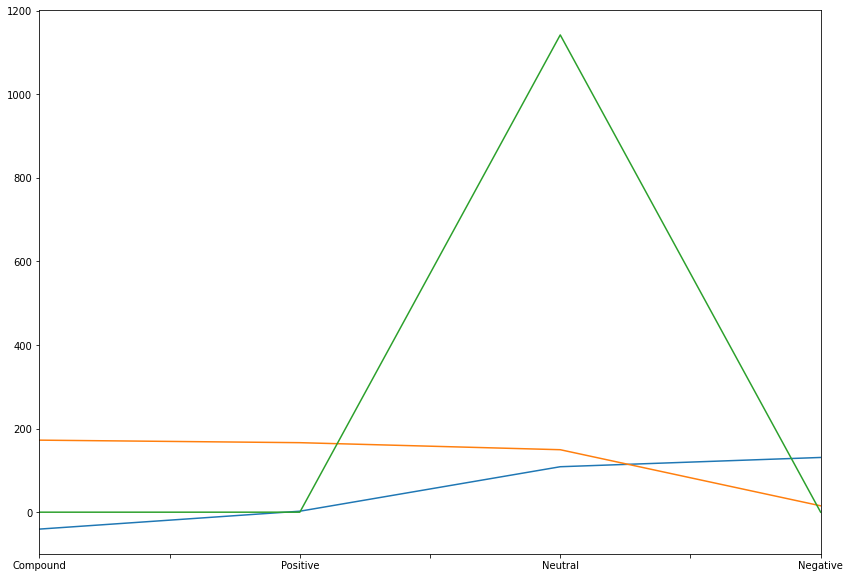

In [72]:
fig=plt.figure(figsize=(14,10))
df_employees[(df_employees.Compound<0.0)][["Compound", "Positive", "Neutral", "Negative"]].sum().plot() #Son Negativas
df_employees[(df_employees.Compound>0.0)][["Compound", "Positive", "Neutral", "Negative"]].sum().plot() #Son Positivas
df_employees[(df_employees.Compound==0.0)][["Compound", "Positive", "Neutral", "Negative"]].sum().plot() #Son Neutrales
#df_employees[(df_employees.Compound<0.0)][["Compound", "Positive", "Neutral", "Negative"]].mean().plot()
#df_employees[(df_employees.Compound>0.0)][["Compound", "Positive", "Neutral", "Negative"]].mean().plot()
#df_employees[(df_employees.Compound<0.0)][["Compound", "Positive", "Neutral", "Negative"]].count().plot()
#df_employees[(df_employees.Compound>0.0)][["Compound", "Positive", "Neutral", "Negative"]].count().plot()


In [73]:
df_employees[(df_employees.Compound>0)].groupby(df_employees.Status).Compound.count() # Cuenta de trabajadores con sugerencias positivas

Status
Current    193
Past       138
Name: Compound, dtype: int64

In [74]:
df_employees[(df_employees.Compound<0)].groupby(df_employees.Status).Compound.count() # Cuenta de trabajadores con sugerencias negativas

Status
Current    146
Past        96
Name: Compound, dtype: int64

In [75]:
# Suma y promedio de trabajadores con sugerencias positivas
df_employees[(df_employees.Compound>0)].groupby(df_employees.Status)[['Est_Income', 'length_of_hire','Compound', 'Negative', 'Neutral', 'Positive']].aggregate([np.sum, np.mean]) 

Est_Income               length_of_hire            Compound  \
                  sum          mean            sum       mean      sum   
Status                                                                   
Current  1.449478e+07  75102.471859    3318.456362  17.194074  99.3401   
Past     1.034214e+07  74943.043613    2640.255413  19.132286  73.0102   

                  Negative           Neutral           Positive            
             mean      sum      mean     sum      mean      sum      mean  
Status                                                                     
Current  0.514716    7.889  0.040876  89.640  0.464456   95.473  0.494679  
Past     0.529059    7.333  0.053138  59.833  0.433572   70.836  0.513304

In [76]:
 # Suma y promedio de trabajadores con sugerencias negativas
df_employees[(df_employees.Compound<0)].groupby(df_employees.Status)[['Est_Income', 'length_of_hire','Compound', 'Negative', 'Neutral', 'Positive']].aggregate([np.sum, np.mean])

Est_Income               length_of_hire            Compound  \
                  sum          mean            sum       mean      sum   
Status                                                                   
Current  1.091734e+07  74776.311975    1735.595615  11.887641 -23.1835   
Past     7.221067e+06  75219.450566    1081.726059  11.267980 -17.2798   

                  Negative           Neutral           Positive            
             mean      sum      mean     sum      mean      sum      mean  
Status                                                                     
Current -0.158791   79.799  0.546568  64.624  0.442630    1.579  0.010815  
Past    -0.179998   51.130  0.532604  44.119  0.459573    0.753  0.007844

In [77]:
df_employees[(df_employees.Compound>0) | (df_employees.Negative>0) | (df_employees.Neutral>0) | (df_employees.Positive>0)].head(3)

,CanDoBetter,ID,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education,Status,CanDoBetter_Clean,Compound,Negative,Neutral,Positive
0,better non-monetary benefits.,2181.0,Y,60095.20000,Y,58.479532,Facility A,More than 90 mnts,Married,Yes,Yes,No,Sales,"Associate, High school, or Certification",Current,better non-monetary benefits,0.6705,0.0,0.154,0.846
1,company outings,2829.0,Y,47049.07979,N,35.714286,Facility B,0-30 mnts,Married,Yes,No,Yes,Sales,"Associate, High school, or Certification",Current,company outings,0.0000,0.0,1.000,0.000
2,"Having more safety meeting, and discussing wha...",2144.0,Y,60724.12250,Y,17.152659,Facility B,60-90 mnts,Married,Yes,Yes,Yes,Sales,Masters Degree,Past,having more safety meeting and discussing what...,0.4754,0.0,0.904,0.096


## <b>Paso 3.4)</b> Entrenamiento de los datos

Dado que ahora ya contamos con un rango de valores para analizar los comentarios, debemos preocuparnos por todo el resto de los campos para que los modelos puedan procesarlos. Por esta razón vamos a transformar el resto de las colmunas a formato binario.

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
#En este punto estamos transformado las variables con campos string a binario, generando asi tantas columnas nuevas como valores discretos que habian en cada columna

df_dummyes = pd.get_dummies(df_employees[["Facility","Marital","PositionType","Education","DriveTime"]]) # Variables con más de una categoria
df_dummyes_dic = df_employees[["Training","Benefit","SpousalBenefit", "StockPlan", "TrainingRecieved"]].replace("Y",1).replace("N",0).replace("Yes",1).replace("No",0)
df_model = pd.concat([df_employees,df_dummyes], axis=1).drop(["Training","Benefit","SpousalBenefit", "StockPlan", "TrainingRecieved"], axis=1)
df_model = pd.concat([df_model,df_dummyes_dic], axis=1)

In [80]:
y = df_model["Status"].replace("Current", 1).replace("Past", 0)

#X = df_model.drop(["Status","CanDoBetter","CanDoBetter_Clean","ID","Facility","Marital","PositionType","Education","DriveTime"], axis=1)

# Con todas las variables de compund
X=df_model[['length_of_hire','Est_Income','Benefit','Facility_Facility A', 'Compound','Training','Facility_Facility B','PositionType_Executive Management',
 'DriveTime_More than 90 mnts','PositionType_Non-Managerial/ Professional','StockPlan','DriveTime_0-30 mnts','Education_Associate, High school, or Certification',
 'PositionType_Supervisor / Lead Tech.','Education_Masters Degree','Marital_Status Unknown','Education_Baccalaureate or 4 year college degree','TrainingRecieved']]

# Con todas las variables de compund
#X=df_model[['length_of_hire','Est_Income','Benefit','Facility_Facility A','Neutral', 'Compound','Training','Facility_Facility B','PositionType_Executive Management'
# ,'DriveTime_More than 90 mnts','PositionType_Non-Managerial/ Professional','StockPlan','DriveTime_0-30 mnts','Positive','Education_Associate, High school, or Certification',
# 'Negative','PositionType_Supervisor / Lead Tech.','Education_Masters Degree']]
#,

In [81]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

 ## <b>Paso 4)</b> Aplicación de modelos supervisados de clasificación

 ## <b>Paso 4.1)</b> Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

# Aplicamos un bucle para el RFC a cada cluster, en cada iteración asignamos 
# como valor 1 al label cuando se analiza el clúster especifico y un 0 para el resto de la información
forest = RandomForestClassifier(n_estimators=500, random_state=0, max_depth = None, 
                                 min_samples_split = 2, min_samples_leaf = 1, n_jobs=5)
 # Entrenamiento de lo modelo
model_rfc = forest.fit(X_train.values,y_train.values)

In [83]:
#En este bloque podemos obervar un ranking en las variables utilizadas

variablesimportantes = model_rfc.feature_importances_
model_rfc_var_import = pd.DataFrame(list(zip(X_train.columns,variablesimportantes))).sort_values(1,ascending=False)
model_rfc_var_import.columns = ["Variable", "Ranking_RFC"]
model_rfc_var_import.reset_index(drop=True, inplace=True)
#model_rfc_var_import.Variable.values.tolist()
model_rfc_var_import

,Variable,Ranking_RFC
0,length_of_hire,0.225849
1,Est_Income,0.199002
2,Compound,0.072420
3,Benefit,0.058835
4,Facility_Facility A,0.047009
5,Training,0.041045
6,DriveTime_More than 90 mnts,0.037356
7,PositionType_Non-Managerial/ Professional,0.034862
8,DriveTime_0-30 mnts,0.034104
9,Facility_Facility B,0.032244


In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

y_train_pred = model_rfc.predict(X_train)
y_test_pred = model_rfc.predict(X_test)

print("Accurancy de train es: ",accuracy_score(y_train, y_train_pred))
print("Accurancy de test es: ",accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

Accurancy de train es:  0.9958333333333333
Accurancy de test es:  0.8252427184466019
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       239
           1       0.81      0.87      0.84       276

    accuracy                           0.83       515
   macro avg       0.83      0.82      0.82       515
weighted avg       0.83      0.83      0.82       515



 ## <b>Paso 4.2)</b> Naïve Bayes

In [85]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.naive_bayes import GaussianNB 

model_nb = GaussianNB()  
model_nb.fit(X_train, y_train) #Realizo una predicción  

y_train_pred_nb = model_nb.predict(X_train)
y_test_pred_nb = model_nb.predict(X_test)

print("Accurancy de train es: ",accuracy_score(y_train, y_train_pred_nb))
print("Accurancy de test es: ",accuracy_score(y_test, y_test_pred_nb))

print(classification_report(y_test, y_test_pred_nb))

Accurancy de train es:  0.6866666666666666
Accurancy de test es:  0.6737864077669903
              precision    recall  f1-score   support

           0       0.70      0.51      0.59       239
           1       0.66      0.81      0.73       276

    accuracy                           0.67       515
   macro avg       0.68      0.66      0.66       515
weighted avg       0.68      0.67      0.67       515



 ## <b>Paso 4.3)</b> Regresión Logistica

In [86]:
from sklearn.linear_model import LogisticRegression

# Aplicación del Modelo logistico
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
# Predicciones y Accurancy del Modelo Logistico
y_train_pred_log = model_log.predict(X_train)
y_test_pred_log = model_log.predict(X_test)

print("Accurancy de train es: ",accuracy_score(y_train, y_train_pred_log))
print("Accurancy de test es: ",accuracy_score(y_test, y_test_pred_log))

print(classification_report(y_test, y_test_pred_log))

Accurancy de train es:  0.5608333333333333
Accurancy de test es:  0.5359223300970873
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       239
           1       0.54      1.00      0.70       276

    accuracy                           0.54       515
   macro avg       0.27      0.50      0.35       515
weighted avg       0.29      0.54      0.37       515



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 ## <b>Paso 5) </b> Valoración del campo objetivo mediante el modelo Random Forest Classifier
 
En s<ete paso vamos a asignar una probabilidad al campo que estamos tratando de predecir mediante el modelo Random Forest Classifier, ya que fue el que presento mejor accuracy.

In [87]:
df_predict = pd.DataFrame(list(zip(list(model_rfc.predict(X)),list(model_rfc.predict_proba(X)))))

df_predict["Current_Prob"] = 0.00000000000000000
df_predict["Past_Prob"] = 0.00000000000000000
for i in range(0,len(df_predict)):
    for j in range(0,len(df_predict[1][i])):
        if j == 0:
            df_predict["Past_Prob"][i] = df_predict[1][i][j]
        if j == 1:
            df_predict["Current_Prob"][i] = df_predict[1][i][j]
            
df_predict.drop(1,axis=1,inplace=True)
df_predict.columns = ["Status_Pred", 'Current_Prob', 'Past_Prob']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [88]:
df_temp = pd.concat([df_employees, df_predict], axis=1)
df_final= df_temp[['CanDoBetter', 'ID', 'Training', 'Est_Income', 'Benefit',
       'length_of_hire', 'Facility', 'DriveTime', 'Marital', 'SpousalBenefit',
       'StockPlan', 'TrainingRecieved', 'PositionType', 'Education', 'Status',
       'Compound','Status_Pred', 'Current_Prob', 'Past_Prob']]
df_final["Status_Num"] = 0
df_final["Status_Num"] = df_final["Status"]
df_final["Status_Num"] = df_final["Status_Num"].replace("Current", 1).replace("Past", 0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

In [89]:
df_final = df_final[['CanDoBetter', 'ID', 'Training', 'Est_Income', 'Benefit',
       'length_of_hire', 'Facility', 'DriveTime', 'Marital', 'SpousalBenefit',
       'StockPlan', 'TrainingRecieved', 'PositionType', 'Education', 'Status','Status_Num',
       'Status_Pred', 'Current_Prob', 'Past_Prob', 'Compound']]

df_final.columns = ['CanDoBetter', 'ID', 'Training', 'Est_Income', 'Benefit',
       'length_of_hire', 'Facility', 'DriveTime', 'Marital', 'SpousalBenefit',
       'StockPlan', 'TrainingRecieved', 'PositionType', 'Education', 'Status','Status_Num',
       'Status_Pred', 'Current_Prob', 'Past_Prob', 'Valoración_CanDoBetter']

In [94]:
df_final

,CanDoBetter,ID,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education,Status,Status_Num,Status_Pred,Current_Prob,Past_Prob,Valoración_CanDoBetter
0,better non-monetary benefits.,2181.0,Y,60095.20000,Y,58.479532,Facility A,More than 90 mnts,Married,Yes,Yes,No,Sales,"Associate, High school, or Certification",Current,1,1,0.818000,0.182000,0.6705
1,company outings,2829.0,Y,47049.07979,N,35.714286,Facility B,0-30 mnts,Married,Yes,No,Yes,Sales,"Associate, High school, or Certification",Current,1,1,0.978000,0.022000,0.0000
2,"Having more safety meeting, and discussing wha...",2144.0,Y,60724.12250,Y,17.152659,Facility B,60-90 mnts,Married,Yes,Yes,Yes,Sales,Masters Degree,Past,0,0,0.155833,0.844167,0.4754
3,careerpromotions,1356.0,N,63784.21843,Y,5.271481,Facility A,More than 90 mnts,Married,Yes,No,No,Sales,"Associate, High school, or Certification",Past,0,0,0.020000,0.980000,0.0000
4,careerpromotions,2807.0,N,87665.23353,N,4.244482,Facility A,More than 90 mnts,Married,Yes,Yes,No,Sales,"Doctorate (PhD, EdD, etc)",Past,0,0,0.022000,0.978000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,pay,2632.0,N,93322.10000,Y,3.342246,Facility A,0-30 mnts,Status Unknown,No,Yes,No,Non-Managerial/ Professional,Masters Degree,Past,0,0,0.016000,0.984000,-0.1027
1711,pay,2119.0,N,93322.10000,Y,3.342246,Facility A,0-30 mnts,Status Unknown,No,Yes,No,Non-Managerial/ Professional,Masters Degree,Past,0,0,0.016000,0.984000,-0.1027
1712,listen and take action,2896.0,N,93322.10000,Y,3.342246,Facility A,0-30 mnts,Status Unknown,No,No,No,Non-Managerial/ Professional,Masters Degree,Past,0,0,0.030000,0.970000,0.0000
1713,pay more,2388.0,N,93322.10000,Y,3.342246,Facility A,0-30 mnts,Status Unknown,No,Yes,No,Non-Managerial/ Professional,Masters Degree,Past,0,0,0.016000,0.984000,-0.1027


 ## <b>Paso 5.1) </b> Analisis del modelo

In [90]:
#En este paso podemos visualizar la cantidad de status predecidos que difieren de la realidad.

df_final[df_final.Status_Pred != df_final.Status_Num].Status_Pred.count()

95

 ## <b>Paso 6) </b> Conclusión
 
 
 En la siguiente tabla podemos obervar cual es la probabilidad promedio de que un empleado actual pueda marcharse (Status_Pred = "0") y de que el empleado opte por quedarse (Status_Pred = "1")

In [91]:
df_final[df_final.Status_Num==1][['Current_Prob', 'Past_Prob', 'Valoración_CanDoBetter']].groupby(df_final.Status_Pred).mean()

,Current_Prob,Past_Prob,Valoración_CanDoBetter
Status_Pred,,,
0,0.365305,0.634695,0.187620
1,0.885748,0.114252,0.076138


In [93]:
stop

NameError: name 'stop' is not defined